In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#### read file and delete extra column ####

In [12]:
data = pd.read_csv("webscrape2.csv")
del data["Unnamed: 0"]

In [ ]:
#### split prices in two columns (actual and previous)

In [13]:
new = data['Price'].str.split(" ", n = 1, expand = True)
data['Previous_price'] = new[0]
data['Discount_price'] = new[1]
data.drop(columns = ['Price'], inplace = True)

In [ ]:
#### transform prices into float, create diff column to look at the difference between previous and discounted prices #####

In [19]:
data['Previous_price'] = data['Previous_price'].str.replace(',', '')
data['Previous_price'] = data['Previous_price'].str.replace('$', '')
data['Previous_price'] = data['Previous_price'].astype(float)

In [21]:
data['Discount_price'] = data['Discount_price'].str.replace(',', '')
data['Discount_price'] = data['Discount_price'].str.replace('$', '')
data['Discount_price'] = data['Discount_price'].astype(float)

In [24]:
data["Price_diff"] = data['Previous_price'] - data['Discount_price']

In [ ]:
### Delete irrelevant variables, SKU (although useful for ID, has a lot of NA values) and Class (only useful for Whisky, might use later)

In [26]:
del data['SKU']

In [31]:
del data['Class']

In [ ]:
### drop NA values (observations lacking infromation such as Brand, Proof, Type and Region)

In [45]:
clean_data = data.dropna(axis=0, how='any')

In [ ]:
### group data to every region's type of liquor ####

In [54]:
groupby_type_region = clean_data.groupby(['Type', 'Region'])

In [53]:
clean_data[['Name', 'Type']].groupby('Type').count()

,Name
Type,
Absinthe,1
Bitters,7
Bourbon,3
Brandy,10
Cognac,15
"Cognac, Liqueur",1
Gin,20
"Gin, Liqueur",3
Liqueur,27


In [181]:
COUNT=data.Type.value_counts(dropna=False)
df1=pd.DataFrame(COUNT)
#df1

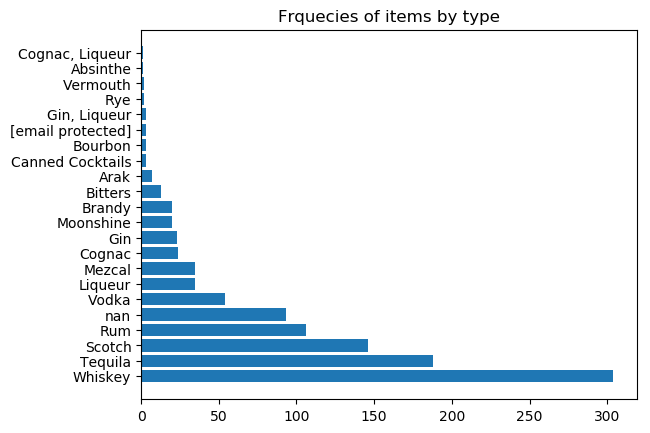

In [162]:
plt.rcdefaults()
fig, ax = plt.subplots()

x = np.arange(len(df1))
ax.set_yticks(x)
ax.set_yticklabels(df1.index)
ax.barh(x,COUNT)
ax.set_title('Frquecies of items by type')

plt.show()

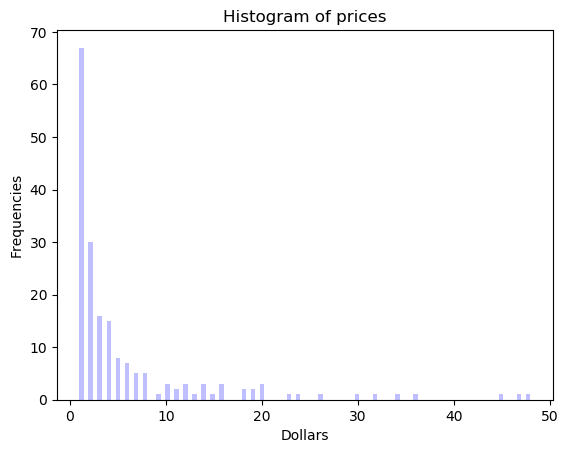

In [178]:
x1=data.Price.value_counts(dropna=False)
num_bins = 100
n, bins, patches = plt.hist(x1, num_bins, facecolor='blue', alpha=0.25)
plt.xlabel('Dollars')
plt.ylabel('Frequencies')
plt.title('Histogram of prices')
plt.show()